<a href="https://colab.research.google.com/github/dpogue2025/movietest/blob/main/Copy_of_practice_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Encoding Mapping for 'ent_name': {'H4BAT001': 0, 'H4BAT004': 1, 'H4EXT001': 2, 'H4EXT001_Extruder': 3, 'H4EXT002': 4, 'H4EXT002_Extruder': 5, 'H4EXT003': 6, 'H4EXT003_Extruder': 7, 'H4EXT004': 8, 'H4EXT004_Extruder': 9, 'H4PKG004': 10, 'H4PKG004_BagHanger': 11, 'H4PKG004_CasePacker': 12, 'H4PKG004_Palletizer': 13, 'H4PKG004_StretchWrapper_A': 14, 'H4PKG004_StretchWrapper_B': 15, 'H4PKG005': 16, 'H4PKG005_BagHanger': 17, 'H4PKG005_CasePacker': 18, 'H4PKG005_Palletizer': 19, 'H4PKG007': 20, 'H4PKG007_BagHanger': 21, 'H4PKG007_Palletizer': 22, 'H4PKG007_StretchWrapper': 23, 'H4PKG008': 24, 'H4PKG008_BagHanger': 25, 'H4PKG008_Palletizer': 26, 'H4PKG008_StretchWrapper': 27, 'H4PKG009': 28, 'H4PKG009_BagHanger': 29, 'H4PKG009_Palletizer': 30, 'H4PKG009_StretchWrapper': 31}
'H4PKG004_Palletizer' is encoded as: 13
Mean Squared Error: 63802472.817294024
R-squared: 0.05806088323241554
Mean Absolute Error: 4479.59194537144


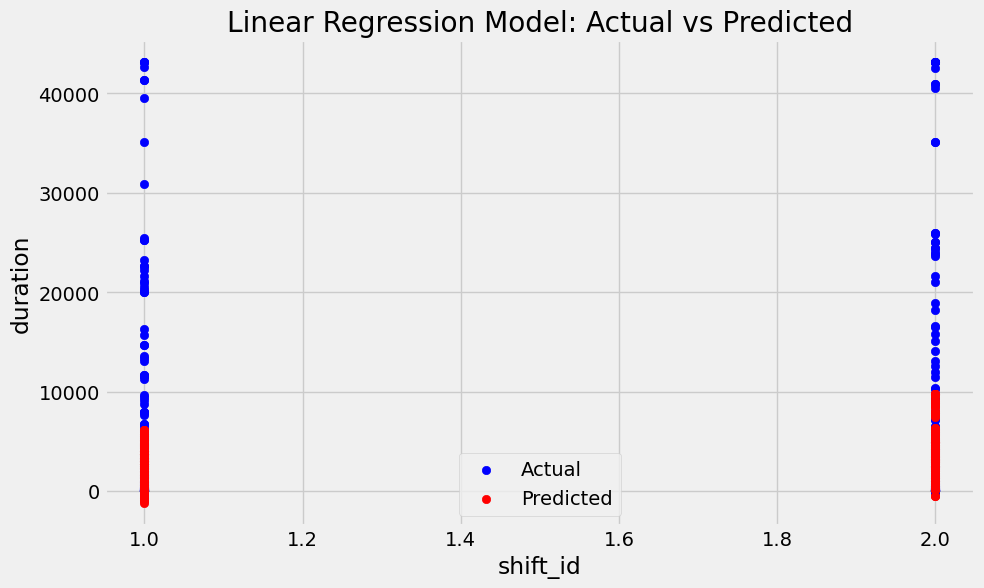

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv(r"/content/downtime_data.csv")

# Encode categorical features
if 'ent_name' in df.columns:
    encoder = LabelEncoder()
    df['ent_name_encoded'] = encoder.fit_transform(df['ent_name'])

# Display encoding mapping for 'ent_name'
encoder_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Encoding Mapping for 'ent_name':", encoder_mapping)

# Check if a specific value like 'H4PKG004_Palletizer' is encoded correctly
if 'H4PKG004_Palletizer' in encoder_mapping:
    print(f"'H4PKG004_Palletizer' is encoded as: {encoder_mapping['H4PKG004_Palletizer']}")
else:
    print(f"'H4PKG004_Palletizer' not found in the data.")

# ----> Convert 'event_time_local' to numerical features
# Extract relevant features from the datetime column
df['event_time_local'] = pd.to_datetime(df['event_time_local'])
df['event_hour'] = df['event_time_local'].dt.hour
df['event_dayofweek'] = df['event_time_local'].dt.dayofweek

# Select features including shift_id and the new numerical features from 'event_time_local'
X = df[['shift_id', 'ent_name_encoded', 'event_hour', 'event_dayofweek']]
y = df['duration']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test['shift_id'], y_test, color='blue', label='Actual')
plt.scatter(X_test['shift_id'], y_pred, color='red', label='Predicted')
plt.xlabel('shift_id')
plt.ylabel('duration')
plt.title('Linear Regression Model: Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data
df= pd.read_csv(r"/content/downtime_data.csv")
df.head()
df.drop(['shift_id', 'color', 'job_start_local', 'job_end_local', 'log_id', 'ent_id', 'shift_start_local' ], axis=1, inplace=True)
df.head()








,event_time_local,ent_name,wo_id,item_id,item_desc,shift_desc,state_desc,reas_cd,reas_desc,reas_grp_id,duration,comments,reas_grp_desc
0,2025-02-07 20:33:24.0000000 +00:00,H4PKG004,9912662.0,000000000000001462,SD Fel A11+ Ckn 3.5lb bg,Shift-2,DOWNTIME,729,Conveyor,116,93,case stuck at diverter,SB Downstream
1,2025-01-25 02:45:02.0000000 +00:00,H4PKG005_BagHanger,9911190.0,000000000000001462,SD Fel A11+ Ckn 3.5lb bg,Shift-1,DOWNTIME,64,Palletizer,56,384,pallet stuck on the outfeed coveyor,SNBagHanger
2,2025-01-25 03:08:11.0000000 +00:00,H4PKG005_BagHanger,9911190.0,000000000000001462,SD Fel A11+ Ckn 3.5lb bg,Shift-1,DOWNTIME,446,Case Sealer,56,252,tape not cut,SNBagHanger
3,2025-01-25 03:12:35.0000000 +00:00,H4PKG005_BagHanger,9911190.0,000000000000001462,SD Fel A11+ Ckn 3.5lb bg,Shift-1,DOWNTIME,64,Palletizer,56,219,door switch triggered on the palletizer outfeed,SNBagHanger
4,2025-01-25 03:18:26.0000000 +00:00,H4PKG005_BagHanger,9911190.0,000000000000001462,SD Fel A11+ Ckn 3.5lb bg,Shift-1,DOWNTIME,552,Case Packer,56,162,case failed to leave,SNBagHanger


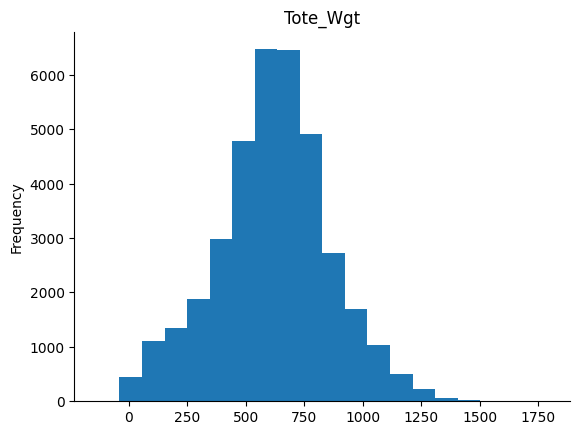

In [ ]:
# @title Tote_Wgt

from matplotlib import pyplot as plt
df['Tote_Wgt'].plot(kind='hist', bins=20, title='Tote_Wgt')
plt.gca().spines[['top', 'right',]].set_visible(False)

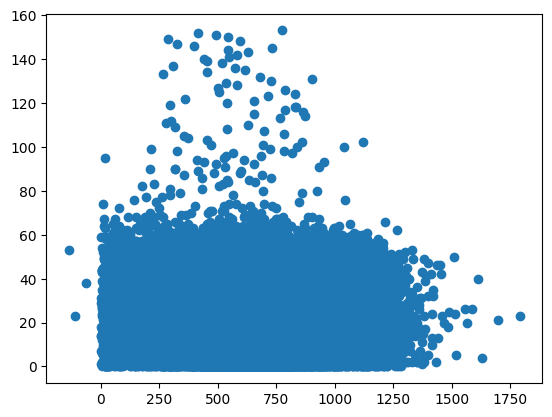

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Tote_Wgt'], df['Dump_Totals'])




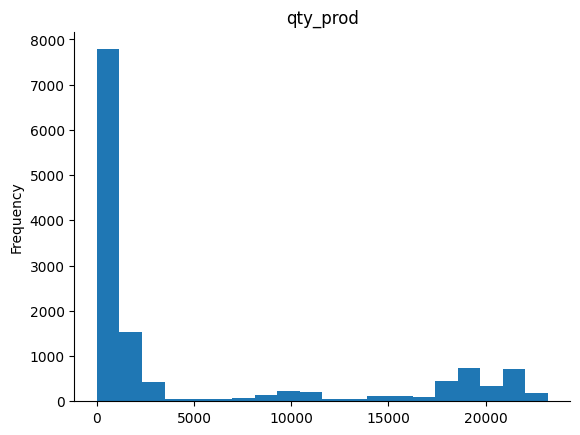

In [ ]:
from matplotlib import pyplot as plt
prd_data['qty_prod'].plot(kind='hist', bins=20, title='qty_prod')
plt.gca().spines[['top', 'right',]].set_visible(False)

R2 score on test data: 0.027791694939965694


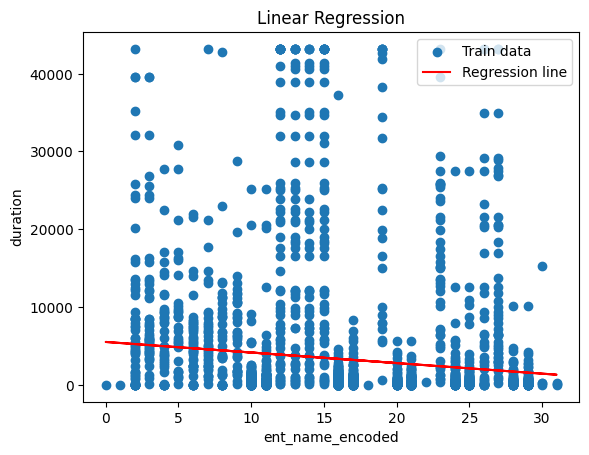

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Load dataset
scrap = pd.read_csv('/content/downtime_data.csv')

# Separate features and target
# ----> Create a LabelEncoder instance
encoder = LabelEncoder()
# ----> Fit the encoder to the 'ent_name' column and transform it
df['ent_name_encoded'] = encoder.fit_transform(df['ent_name'])
x = df['ent_name_encoded'].values.reshape(-1, 1) # Use the encoded column
y = df['duration']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23, test_size=0.2)

# Initialize and fit the model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Generate predictions
y_pred = lr.predict(x_test)

# Calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score on test data:", r2)

# Plotting
plt.scatter(x_train, y_train, label='Train data')
plt.plot(x_train, lr.predict(x_train), color='red', label='Regression line')
plt.xlabel('ent_name_encoded') # Update x-axis label
plt.ylabel('duration')
plt.title('Linear Regression')
plt.legend()
plt.show()

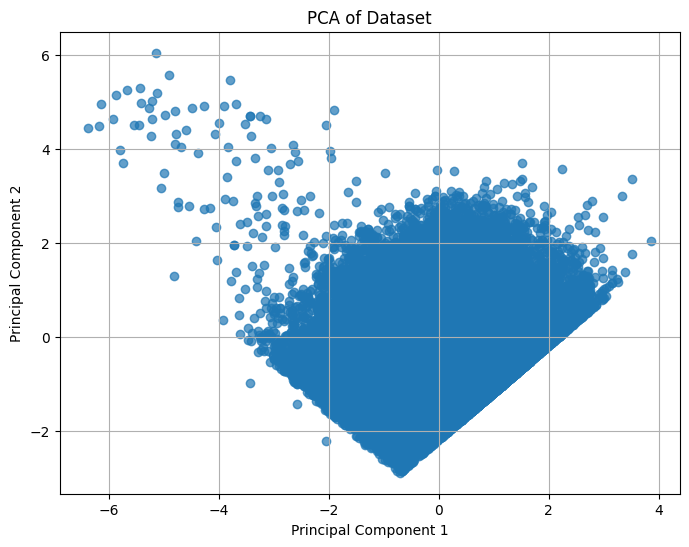

Explained variance ratio: [0.52485897 0.47514103]


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
# Assume `df` is your DataFrame loaded with features, excluding the target column if applicable
scrap = pd.read_csv('/content/Federated BF_Scrap_2.0 (1).csv')

# Selecting features (excluding any target columns)
features = ['Tote_Wgt', 'Dump_Totals']  # Add other relevant feature columns as needed
x = scrap[features]

# Standardize data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)  # Choose number of components to keep
x_pca = pca.fit_transform(x_scaled)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.grid(True)
plt.show()

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statsmodels.api as sm

# Load data
scrap = pd.read_csv('/content/Federated BF_Scrap_2.0 (1).csv')

# Define features and target
features = scrap.drop(columns='Tote_Wgt')
target = scrap['Dump_Totals']

# ----> Convert categorical features to numeric using OneHotEncoding
categorical_features = features.select_dtypes(include=['object']).columns
# ----> Exclude 'Time' from categorical features as it will be handled separately
categorical_features = categorical_features[categorical_features != 'Time']
# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for array output
# Fit the encoder to the categorical columns
encoder.fit(features[categorical_features])
# Transform the categorical features and get feature names
encoded_features = encoder.transform(features[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
# Create a DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=features.index)
# Concatenate encoded features with numerical features
features = pd.concat([features.drop(columns=categorical_features), encoded_df], axis=1)

# ----> Convert 'Time' column to numeric representing total seconds
# Assuming the 'Time' column has format like '46:46.0' (minutes:seconds.milliseconds)
features['Time'] = pd.to_datetime(features['Time'], format='%M:%S.%f', errors='coerce').dt.time
features['Time'] = pd.to_timedelta(features['Time'].astype(str)).dt.total_seconds()

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Forward stepwise selection using linear regression
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select='auto', direction='forward')
sfs.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[sfs.get_support()]

# Build regression model using selected features
model = LinearRegression()
model.fit(X_train[selected_features], y_train)

# Output important coefficients and p-values
X_train_const = sm.add_constant(X_train[selected_features])
model_sm = sm.OLS(y_train, X_train_const).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            Dump_Totals   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.044e+29
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:08:25   Log-Likelihood:             6.7004e+05
No. Observations:               25671   AIC:                        -1.340e+06
Df Residuals:                   25618   BIC:                        -1.340e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

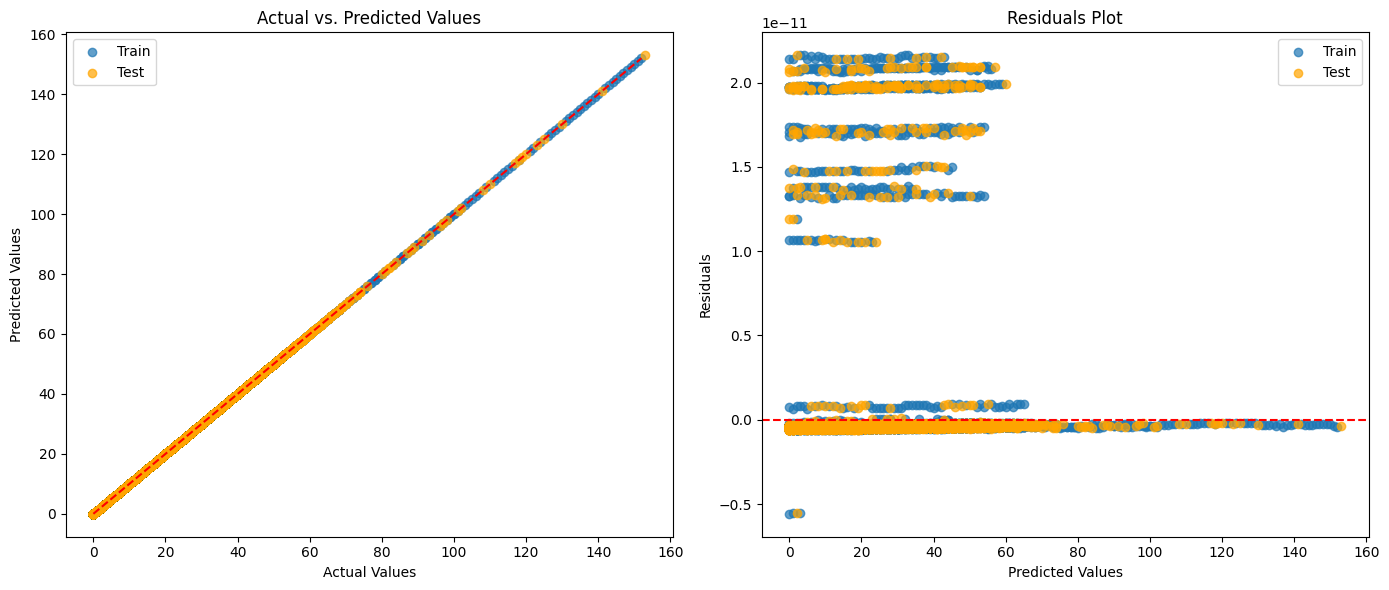

In [ ]:
import matplotlib.pyplot as plt

# Predict the target values for both training and test sets
y_train_pred = model.predict(X_train[selected_features])
y_test_pred = model.predict(X_test[selected_features])

# 1. Actual vs. Predicted Values Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.7)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.7, color='orange')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()

# 2. Residuals Plot
plt.subplot(1, 2, 2)
plt.scatter(y_train_pred, y_train - y_train_pred, label='Train', alpha=0.7)
plt.scatter(y_test_pred, y_test - y_test_pred, label='Test', alpha=0.7, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define a more complex model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[x_train.shape[1]]),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Use early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Fit the model with validation split
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])

# Evaluate the model
model.evaluate(x_test, y_test)

model.summary()

NameError: name 'tf' is not defined

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/Federated BF_Scrap_2.0 (1).csv')

# Assume 'is_scrap' is a binary column depicting whether scrap occurred
features = data.drop(columns=['Dump_Totals'])  # All other features
target = data['Tote_Wgt']

# ----> Convert 'Time' column to numerical representation
features['Time'] = pd.to_datetime(features['Time'], format='%M:%S.%f', errors='coerce').dt.time
features['Time'] = pd.to_timedelta(features['Time'].astype(str)).dt.total_seconds()

# ----> Convert categorical features to numerical using Label Encoding
for column in features.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    features[column] = label_encoder.fit_transform(features[column])

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a random forest classifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Evaluate feature importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features.columns).sort_values(ascending=False)

print("Feature Importances:\n", feature_importance)

# Classification report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Try reading the file with a different encoding
try:
    df = pd.read_csv(r'/content/Federated BF_Scrap_2.0 (2).xlsx', encoding='latin-1')  # Or 'cp1252', 'iso-8859-1', etc.
except UnicodeDecodeError:
    # If 'latin-1' doesn't work, try 'cp1252'
    df = pd.read_csv(r'/content/Federated BF_Scrap_2.0 (2).xlsx', encoding='cp1252')

# Continue with your code...

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2
